In [1]:
!pip install openpyxl
!pip install seaborn
!pip install -U scikit-learn
!pip install pandas==2.1.4

  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
amazon-sagemaker-sql-magic 0.1.3 requires sqlparse==0.5.0, but you have sqlparse 0.5.1 which is incompatible.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-multimodal 1.1.1 requires jsonschema<4.2

# Descarga y Carga de Datos desde AWS S3

Este script en **Python** utiliza la biblioteca `boto3` para descargar archivos CSV almacenados en **Amazon S3** y luego cargarlos en **pandas DataFrames** para su análisis y manipulación.

## 📌 Funcionalidad
1. Configura un cliente S3 para acceder al bucket `sagemaker-fossa`.
2. Descarga cinco archivos CSV desde la ruta `fossa/xlsx/` en S3.
3. Carga cada archivo en un DataFrame de `pandas` con la configuración adecuada de codificación y delimitador.
4. Imprime la estructura y las primeras filas de cada conjunto de datos.
5. Maneja errores de forma individual para cada archivo, permitiendo continuar con el proceso a pesar de fallos en la descarga o lectura.

## 📂 Archivos procesados
- **Bd_Transacciones.csv** → Codificación UTF-8, separador `,`
- **GanadoRematadoFeria.csv** → Codificación ISO-8859-1, separador `;`
- **dolar.csv** → Codificación UTF-8, separador `;`
- **Clima.csv** → Codificación UTF-8, separador `;`
- **recinto.csv** → Codificación ISO-8859-1, separador `;`

In [2]:
import pandas as pd
import boto3

# Configurar el cliente S3
s3_client = boto3.client('s3')
bucket = 'sagemaker-fossa'
base_path = 'fossa/xlsx/'

# Diccionario para almacenar los datasets
datasets = {}

# Archivo principal: Bd_Transacciones.csv
try:
    local_filename = 'Bd_Transacciones.csv'
    print(f"Descargando y cargando el archivo: {local_filename}")
    s3_client.download_file(bucket, base_path + local_filename, local_filename)
    datasets["bd_transacciones"] = pd.read_csv(local_filename, encoding='utf-8', sep=',', low_memory=False)
    print("\nEstructura de bd_transacciones:")
    print(datasets["bd_transacciones"].info())
    print(datasets["bd_transacciones"].head())
except Exception as e:
    print(f"Error al procesar Bd_Transacciones.csv: {e}")

# Archivo: GanadoRematadoFeria.csv
try:
    local_filename = 'GanadoRematadoFeria.csv'
    print(f"Descargando y cargando el archivo: {local_filename}")
    s3_client.download_file(bucket, base_path + local_filename, local_filename)
    datasets["ganado_feria"] = pd.read_csv(local_filename, encoding='ISO-8859-1', sep=';', low_memory=False)
    print("\nEstructura de ganado_feria:")
    print(datasets["ganado_feria"].info())
    print(datasets["ganado_feria"].head())
except Exception as e:
    print(f"Error al procesar GanadoRematadoFeria.csv: {e}")

# Archivo: dolar.csv
try:
    local_filename = 'dolar.csv'
    print(f"Descargando y cargando el archivo: {local_filename}")
    s3_client.download_file(bucket, base_path + local_filename, local_filename)
    datasets["dolar"] = pd.read_csv(local_filename, encoding='utf-8', sep=';', low_memory=False)
    print("\nEstructura de dolar:")
    print(datasets["dolar"].info())
    print(datasets["dolar"].head())
except Exception as e:
    print(f"Error al procesar dolar.csv: {e}")

# Archivo: Clima.csv
try:
    local_filename = 'Clima.csv'
    print(f"Descargando y cargando el archivo: {local_filename}")
    s3_client.download_file(bucket, base_path + local_filename, local_filename)
    datasets["clima"] = pd.read_csv(local_filename, encoding='utf-8', sep=';', low_memory=False)
    print("\nEstructura de clima:")
    print(datasets["clima"].info())
    print(datasets["clima"].head())
except Exception as e:
    print(f"Error al procesar Clima.csv: {e}")

# Archivo: recinto.csv
try:
    local_filename = 'recinto.csv'
    print(f"Descargando y cargando el archivo: {local_filename}")
    s3_client.download_file(bucket, base_path + local_filename, local_filename)
    datasets["recinto"] = pd.read_csv(local_filename, encoding='ISO-8859-1', sep=';', low_memory=False)
    print("\nEstructura de recinto:")
    print(datasets["recinto"].info())
    print(datasets["recinto"].head())
except Exception as e:
    print(f"Error al procesar recinto.csv: {e}")


Descargando y cargando el archivo: Bd_Transacciones.csv

Estructura de bd_transacciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981482 entries, 0 to 981481
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   idRegistro             981482 non-null  int64  
 1   Tipo_Remate            981481 non-null  object 
 2   Recinto                981482 non-null  int64  
 3   Fecha                  981482 non-null  object 
 4   Cantidad               981482 non-null  int64  
 5   Especie                981482 non-null  int64  
 6   Raza                   916522 non-null  object 
 7   Marca                  958224 non-null  object 
 8   Precio_Kilo            981482 non-null  float64
 9   Kilos                  981482 non-null  int64  
 10  Neto                   981482 non-null  int64  
 11  Rut_Vendedor           981480 non-null  object 
 12  Tipo_Documento_Venta   981118 non-null  float64
 13  

In [3]:
# Crear tabla resumen de valores nulos
def resumen_nulos(df):
    resumen = pd.DataFrame({
        "Campos Nulos": df.isnull().sum(),
        "Total de Campos": len(df),
        "Porcentaje de Nulos (%)": (df.isnull().sum() / len(df)) * 100
    })
    return resumen

# Aplicar función al dataset principal
resumen = resumen_nulos(datasets["bd_transacciones"])

# Mostrar tabla ordenada por porcentaje de nulos
resumen = resumen.sort_values(by="Porcentaje de Nulos (%)", ascending=False)
print(resumen)


                       Campos Nulos  Total de Campos  Porcentaje de Nulos (%)
Clave_instancia              924910           981482                94.236063
Raza                          64960           981482                 6.618563
Marca                         23258           981482                 2.369682
Rut_Comprador                  4823           981482                 0.491400
Documento_Venta                 364           981482                 0.037087
Tipo_Documento_Venta            364           981482                 0.037087
Corredor_Compra                 318           981482                 0.032400
Tipo_Documento_Compra           318           981482                 0.032400
Documento_Compra                318           981482                 0.032400
Peso                              3           981482                 0.000306
Rut_Vendedor                      2           981482                 0.000204
Tipo_Remate                       1           981482            

# 🔍 Limpieza y Enriquecimiento de Datos en Python

Este script en **Python** realiza una serie de operaciones sobre un dataset de transacciones ganaderas, con el objetivo de limpiar los datos, imputar valores nulos y enriquecer la información mediante la integración de datos externos. 

##  Funcionalidad

1. **Resumen de Valores Nulos**  
   - Se genera una tabla con el conteo y porcentaje de valores nulos en el dataset principal (`bd_transacciones`).

2. **Eliminación de Columnas Irrelevantes**  
   - Se eliminan campos como identificadores únicos y datos sensibles irrelevantes para el análisis.

3. **Imputación de Valores Nulos**  
   - Se reemplazan valores faltantes en columnas clave mediante técnicas como:
     - Asignación de valores predeterminados (e.g., "Desconocido" para `Raza` y `Marca`).
     - Uso de la mediana para valores numéricos (`Peso`).
     - Conversión a tipo `category` en variables categóricas.

4. **Integración con Datos Externos**  
   - Se realizan cruces con los siguientes datasets externos:
     -  **Dólar (`dolar.csv`)**: Se incorpora el tipo de cambio según la fecha de la transacción.
     -  **Clima (`clima.csv`)**: Se agregan variables meteorológicas al dataset principal.

5. **Corrección de Valores Nulos en Datos Externos**  
   - En las nuevas columnas provenientes de los datasets externos, se aplican estrategias de imputación:
     - Promedio móvil, relleno hacia adelante (`ffill`) y hacia atrás (`bfill`) para el dólar.
     - Interpolación lineal y relleno con la media para datos climáticos.

6. **Generación de Reportes de Calidad de Datos**  
   - Se generan tablas de resumen con:
     - Recuento y porcentaje de valores nulos.
     - Estadísticas descriptivas para columnas numéricas.
     - Verificación de filas con datos incompletos en las variables de clima.

In [4]:
#Eliminar columnas irrelevantes
cols_to_drop = [
    "Clave_instancia", "Rut_Comprador", "Documento_Venta",
    "Tipo_Documento_Venta", "Documento_Compra", "Tipo_Documento_Compra",
    "Rut_Vendedor"
]
df = datasets["bd_transacciones"].drop(columns=cols_to_drop)

# Rellenar valores nulos (sin inplace)
df["Raza"] = df["Raza"].fillna("Desconocido")
df["Marca"] = df["Marca"].fillna("Sin Marca")
df["Peso"] = df["Peso"].fillna(df["Peso"].median())
df["Tipo_Remate"] = df["Tipo_Remate"].fillna("Desconocido")

df["Corredor_Compra"] = df["Corredor_Compra"].fillna("Desconocido")
df["Corredor_Compra"] = df["Corredor_Compra"].astype("category")

# Actualizar el dataset en el diccionario
datasets["bd_transacciones"] = df

# Crear tabla resumen de valores nulos
def resumen_nulos(df):
    resumen = pd.DataFrame({
        "Campos Nulos": df.isnull().sum(),
        "Total de Campos": len(df),
        "Porcentaje de Nulos (%)": (df.isnull().sum() / len(df)) * 100
    })
    return resumen

# Aplicar función al dataset principal
resumen = resumen_nulos(datasets["bd_transacciones"])

# Mostrar tabla ordenada por porcentaje de nulos
resumen = resumen.sort_values(by="Porcentaje de Nulos (%)", ascending=False)
print(resumen)


                 Campos Nulos  Total de Campos  Porcentaje de Nulos (%)
idRegistro                  0           981482                      0.0
Tipo_Remate                 0           981482                      0.0
Recinto                     0           981482                      0.0
Fecha                       0           981482                      0.0
Cantidad                    0           981482                      0.0
Especie                     0           981482                      0.0
Raza                        0           981482                      0.0
Marca                       0           981482                      0.0
Precio_Kilo                 0           981482                      0.0
Kilos                       0           981482                      0.0
Neto                        0           981482                      0.0
Corral                      0           981482                      0.0
Correlativo                 0           981482                  

In [5]:
# Dataset principal
df = datasets["bd_transacciones"]

# Dataset del dólar
dolar = datasets["dolar"]

# Asegurarnos de que las fechas estén en el formato correcto
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
dolar["Fecha"] = pd.to_datetime(dolar["Fecha"], errors="coerce")

# Realizar el cruce
df = df.merge(dolar, on="Fecha", how="left")

# Actualizar el dataset principal en el diccionario
datasets["bd_transacciones"] = df

# Confirmar el resultado
print(df.info())
print(df.head())


/tmp/ipykernel_1318/1957097517.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dolar["Fecha"] = pd.to_datetime(dolar["Fecha"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982027 entries, 0 to 982026
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idRegistro       982027 non-null  int64         
 1   Tipo_Remate      982027 non-null  object        
 2   Recinto          982027 non-null  int64         
 3   Fecha            982027 non-null  datetime64[ns]
 4   Cantidad         982027 non-null  int64         
 5   Especie          982027 non-null  int64         
 6   Raza             982027 non-null  object        
 7   Marca            982027 non-null  object        
 8   Precio_Kilo      982027 non-null  float64       
 9   Kilos            982027 non-null  int64         
 10  Neto             982027 non-null  int64         
 11  Corral           982027 non-null  int64         
 12  Correlativo      982027 non-null  int64         
 13  Corredor_Venta   982027 non-null  int64         
 14  Corredor_Compra  982

In [6]:
# Renombrar la columna 'Valor' a 'Dolar'
df = datasets["bd_transacciones"].rename(columns={"Valor": "Dolar"})

# Convertir 'Fecha' al formato datetime para asegurar compatibilidad
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

# Paso 1: Aplicar promedio móvil
df["Dolar"] = df["Dolar"].fillna(df["Dolar"].rolling(window=5, min_periods=1).mean())

# Paso 2: Rellenar hacia adelante y hacia atrás
df["Dolar"] = df["Dolar"].fillna(method="ffill").fillna(method="bfill")

# Paso 3: Rellenar valores restantes con la media global
mean_dolar = df["Dolar"].mean()
df["Dolar"] = df["Dolar"].fillna(mean_dolar)

# Verificar que no queden valores nulos
print(f"Valores nulos en 'Dolar' después de imputación: {df['Dolar'].isnull().sum()}")

# Actualizar el dataset principal en el diccionario
datasets["bd_transacciones"] = df

# Confirmar el resultado
print(df.info())
print(df.head())



Valores nulos en 'Dolar' después de imputación: 0


/tmp/ipykernel_1318/880639338.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Dolar"] = df["Dolar"].fillna(method="ffill").fillna(method="bfill")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982027 entries, 0 to 982026
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idRegistro       982027 non-null  int64         
 1   Tipo_Remate      982027 non-null  object        
 2   Recinto          982027 non-null  int64         
 3   Fecha            982027 non-null  datetime64[ns]
 4   Cantidad         982027 non-null  int64         
 5   Especie          982027 non-null  int64         
 6   Raza             982027 non-null  object        
 7   Marca            982027 non-null  object        
 8   Precio_Kilo      982027 non-null  float64       
 9   Kilos            982027 non-null  int64         
 10  Neto             982027 non-null  int64         
 11  Corral           982027 non-null  int64         
 12  Correlativo      982027 non-null  int64         
 13  Corredor_Venta   982027 non-null  int64         
 14  Corredor_Compra  982

In [7]:
# Renombrar la columna 'Valor' a 'Dolar' para mayor claridad
df = datasets["bd_transacciones"].rename(columns={"Valor": "Dolar"})

# Convertir 'Fecha' al formato datetime para asegurar compatibilidad
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

# Filtrar registros desde el año 2020
df_2020 = df[df["Fecha"] >= "2020-01-01"]

# Contar valores nulos por fecha
nulos_por_fecha = df_2020[df_2020["Dolar"].isnull()].groupby("Fecha").size().reset_index(name="Valores_Nulos")

# Ordenar por volumen de nulos
nulos_por_fecha = nulos_por_fecha.sort_values(by="Valores_Nulos", ascending=False)

# Mostrar el top 20 de fechas con más nulos
print("Top 20 fechas con más valores nulos en la columna 'Dolar':")
print(nulos_por_fecha.head(20))

# Mostrar estadística general
total_nulos = df_2020["Dolar"].isnull().sum()
print(f"\nTotal de valores nulos en 'Dolar' desde 2020: {total_nulos}")
print(f"Total de registros desde 2020: {len(df_2020)}")


Top 20 fechas con más valores nulos en la columna 'Dolar':
Empty DataFrame
Columns: [Fecha, Valores_Nulos]
Index: []

Total de valores nulos en 'Dolar' desde 2020: 0
Total de registros desde 2020: 382964


In [8]:
# Dataset principal
df = datasets["bd_transacciones"]

# Dataset de clima
clima = datasets["clima"]

# Convertir las columnas 'Fecha' al formato datetime para asegurar compatibilidad
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
clima["Fecha"] = pd.to_datetime(clima["Fecha"], errors="coerce")

# Realizar el cruce
df = df.merge(clima, on="Fecha", how="left")

# Confirmar el resultado
print("Resumen después del cruce con clima:")
print(df.info())
print(df.head())

# Actualizar el dataset principal en el diccionario
datasets["bd_transacciones"] = df




Resumen después del cruce con clima:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982027 entries, 0 to 982026
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   idRegistro            982027 non-null  int64         
 1   Tipo_Remate           982027 non-null  object        
 2   Recinto               982027 non-null  int64         
 3   Fecha                 982027 non-null  datetime64[ns]
 4   Cantidad              982027 non-null  int64         
 5   Especie               982027 non-null  int64         
 6   Raza                  982027 non-null  object        
 7   Marca                 982027 non-null  object        
 8   Precio_Kilo           982027 non-null  float64       
 9   Kilos                 982027 non-null  int64         
 10  Neto                  982027 non-null  int64         
 11  Corral                982027 non-null  int64         
 12  Correlativo          

In [9]:
# Columnas de clima
clima_cols = ["Temperatura_Promedio", "Temperatura_Minima", "Temperatura_Maxima", "Precipitacion"]

# Imputar nulos en columnas de clima
for col in clima_cols:
    # Paso 1: Interpolación lineal
    df[col] = df[col].interpolate(method="linear", limit_direction="both")
    
    # Paso 2: Forward-fill y backward-fill
    df[col] = df[col].fillna(method="ffill").fillna(method="bfill")
    
    # Paso 3: Rellenar con la media (en caso de nulos restantes)
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

# Confirmar que no queden nulos
print(df[clima_cols].isnull().sum())


/tmp/ipykernel_1318/3921128700.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(method="bfill")


Temperatura_Promedio    0
Temperatura_Minima      0
Temperatura_Maxima      0
Precipitacion           0
dtype: int64


In [10]:
# Columnas relacionadas con clima
clima_cols = ["Temperatura_Promedio", "Temperatura_Minima", "Temperatura_Maxima", "Precipitacion"]

# Verificar valores nulos en las columnas de clima
nulos_clima = df[clima_cols].isnull().sum()

# Mostrar el resumen de nulos
print("Valores nulos por columna en las variables de clima:")
print(nulos_clima)

# Mostrar porcentaje de nulos por columna
nulos_clima_pct = (nulos_clima / len(df)) * 100
print("\nPorcentaje de valores nulos por columna en las variables de clima:")
print(nulos_clima_pct)

# Verificar si hay filas con algún valor nulo en las columnas de clima
nulos_totales = df[clima_cols].isnull().any(axis=1).sum()
print(f"\nNúmero total de filas con al menos un valor nulo en las columnas de clima: {nulos_totales}")


Valores nulos por columna en las variables de clima:
Temperatura_Promedio    0
Temperatura_Minima      0
Temperatura_Maxima      0
Precipitacion           0
dtype: int64

Porcentaje de valores nulos por columna en las variables de clima:
Temperatura_Promedio    0.0
Temperatura_Minima      0.0
Temperatura_Maxima      0.0
Precipitacion           0.0
dtype: float64

Número total de filas con al menos un valor nulo en las columnas de clima: 0


# 📊 Exploración y Análisis del Dataset

Este segmento del script tiene como objetivo realizar una exploración inicial del dataset **bd_transacciones**, proporcionando estadísticas descriptivas y verificaciones de calidad de los datos.

## 📌 Funcionalidad

1. **Información General del Dataset**  
   - Se muestra la estructura del dataset, incluyendo el número de filas y columnas, tipos de datos y cantidad de valores nulos en cada columna.

2. **Resumen Estadístico de Variables Numéricas**  
   - Se generan estadísticas clave como:
     - **Media, mediana, desviación estándar**
     - **Mínimo y máximo**
     - **Percentiles (25%, 50%, 75%)**
   - Esto permite comprender la distribución de los datos numéricos.

3. **Análisis de Variables Categóricas**  
   - Se identifican columnas de tipo **cadena de texto** (`object`) o **categóricas** (`category`).
   - Se calcula la frecuencia de valores únicos en cada columna categórica.

4. **Detección de Valores Nulos**  
   - Se imprime un resumen del número de valores nulos por columna.

5. **Ejemplo de Valores por Columna**  
   - Para cada columna, se muestran:
     - **Tipo de dato**
     - **Ejemplo de valores presentes en el dataset**
   - Esto ayuda a entender el contenido de cada variable.

In [11]:
# Crear tabla resumen de valores nulos
def resumen_nulos(df):
    resumen = pd.DataFrame({
        "Campos Nulos": df.isnull().sum(),
        "Total de Campos": len(df),
        "Porcentaje de Nulos (%)": (df.isnull().sum() / len(df)) * 100
    })
    return resumen

# Aplicar función al dataset principal
resumen = resumen_nulos(datasets["bd_transacciones"])

# Mostrar tabla ordenada por porcentaje de nulos
resumen = resumen.sort_values(by="Porcentaje de Nulos (%)", ascending=False)
print(resumen)

                      Campos Nulos  Total de Campos  Porcentaje de Nulos (%)
idRegistro                       0           982027                      0.0
Tipo_Remate                      0           982027                      0.0
Recinto                          0           982027                      0.0
Fecha                            0           982027                      0.0
Cantidad                         0           982027                      0.0
Especie                          0           982027                      0.0
Raza                             0           982027                      0.0
Marca                            0           982027                      0.0
Precio_Kilo                      0           982027                      0.0
Kilos                            0           982027                      0.0
Neto                             0           982027                      0.0
Corral                           0           982027                      0.0

In [12]:
# Dataset principal
df = datasets["bd_transacciones"]

# Información general del dataset
print("Información general del dataset:")
print(df.info())

# Resumen estadístico para columnas numéricas
print("\nResumen estadístico para columnas numéricas:")
print(df.describe())

# Resumen de tipos de datos y valores únicos por columna
print("\nTipos de datos y ejemplos de valores:")
for col in df.columns:
    print(f"Columna: {col}")
    print(f"  Tipo de dato: {df[col].dtype}")
    print(f"  Ejemplo de valores: {df[col].unique()[:5]}")
    print("-" * 50)

# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982027 entries, 0 to 982026
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   idRegistro            982027 non-null  int64         
 1   Tipo_Remate           982027 non-null  object        
 2   Recinto               982027 non-null  int64         
 3   Fecha                 982027 non-null  datetime64[ns]
 4   Cantidad              982027 non-null  int64         
 5   Especie               982027 non-null  int64         
 6   Raza                  982027 non-null  object        
 7   Marca                 982027 non-null  object        
 8   Precio_Kilo           982027 non-null  float64       
 9   Kilos                 982027 non-null  int64         
 10  Neto                  982027 non-null  int64         
 11  Corral                982027 non-null  int64         
 12  Correlativo           982

In [13]:
# Resumen estadístico de las columnas numéricas
print("Estadísticas descriptivas de las columnas numéricas:")
print(df.describe())

# Resumen de las columnas categóricas
print("\nResumen de las columnas categóricas:")
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
print(df[categorical_cols].describe())


Estadísticas descriptivas de las columnas numéricas:
         idRegistro        Recinto                          Fecha  \
count  9.820270e+05  982027.000000                         982027   
mean   9.864694e+10       3.153274  2018-08-24 11:10:30.675531264   
min    1.000000e+00       0.000000            1999-09-09 00:00:00   
25%    2.455075e+05       1.000000            2015-07-28 00:00:00   
50%    4.910140e+05       3.000000            2018-08-09 00:00:00   
75%    7.359755e+05       4.000000            2021-09-29 00:00:00   
max    2.024102e+12      15.000000            2024-10-21 00:00:00   
std    4.320364e+11       2.050937                            NaN   

            Cantidad        Especie   Precio_Kilo          Kilos  \
count  982027.000000  982027.000000  9.820270e+05  982027.000000   
mean        3.679987      28.115607  1.196029e+03    1177.431299   
min         0.000000      -2.000000  0.000000e+00       0.000000   
25%         1.000000       5.000000  7.200000e+02    

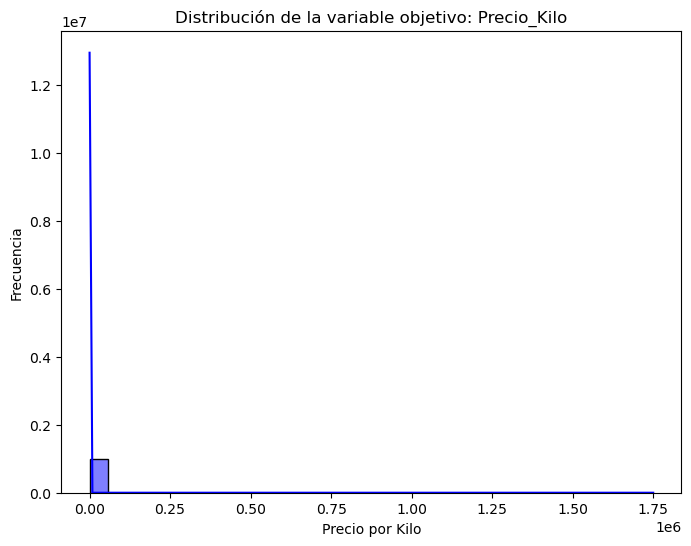

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.histplot(df["Precio_Kilo"], kde=True, bins=30, color="blue")
plt.title("Distribución de la variable objetivo: Precio_Kilo")
plt.xlabel("Precio por Kilo")
plt.ylabel("Frecuencia")
plt.show()


Número de outliers detectados: 15555
        idRegistro Tipo_Remate  Recinto      Fecha  Cantidad  Especie  \
14593         8565           F        6 2012-10-09         2        3   
19042        10516           F        6 2012-10-23         1        4   
46704       603349           P        4 2013-02-26        17        8   
74722        47749           F        1 2013-06-17         2       27   
175059      111504           F        3 2014-09-27        15        9   

               Raza       Marca  Precio_Kilo  Kilos  ...  Corredor_Venta  \
14593           CLA      - LOMO       3100.0     83  ...               0   
19042           PAF    + CADERA       2600.0     30  ...               0   
46704   Desconocido   Sin Marca       7125.0    930  ...               0   
74722   Desconocido  NUCA VERDE       2340.0     65  ...               0   
175059  Desconocido      + LOMO       2180.0   3176  ...               0   

        Corredor_Compra    Grupo    Categoria        Peso   Dolar  

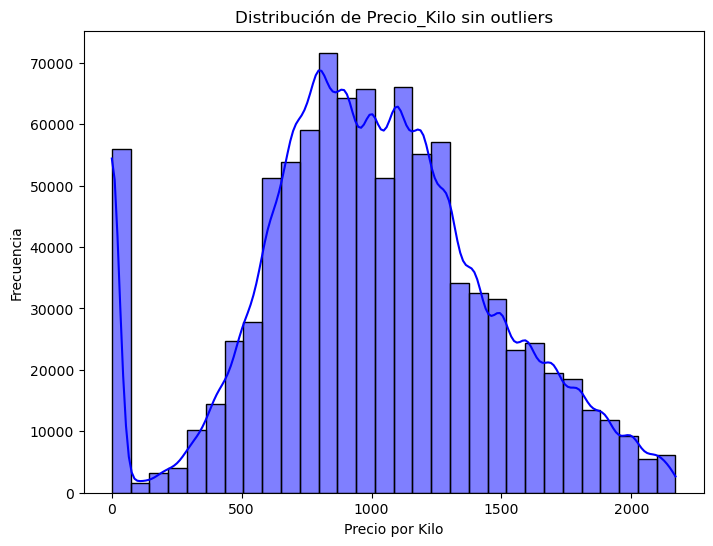

In [15]:
# Cálculo del rango intercuartílico (IQR)
Q1 = df["Precio_Kilo"].quantile(0.25)
Q3 = df["Precio_Kilo"].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar registros fuera de los límites
outliers = df[(df["Precio_Kilo"] < lower_bound) | (df["Precio_Kilo"] > upper_bound)]

# Mostrar cantidad de outliers y ejemplos
print(f"Número de outliers detectados: {len(outliers)}")
print(outliers.head())

# Dataset sin outliers
df_sin_outliers = df[(df["Precio_Kilo"] >= lower_bound) & (df["Precio_Kilo"] <= upper_bound)]

# Nueva visualización de la distribución sin outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_sin_outliers["Precio_Kilo"], kde=True, bins=30, color="blue")
plt.title("Distribución de Precio_Kilo sin outliers")
plt.xlabel("Precio por Kilo")
plt.ylabel("Frecuencia")
plt.show()


In [16]:
# Actualizar el dataset principal con los datos sin outliers
datasets["bd_transacciones"] = df_sin_outliers

# Confirmar que las transformaciones se aplicaron correctamente
print("Resumen del dataset actualizado:")
print(datasets["bd_transacciones"].info())

# Revisar las primeras filas del dataset actualizado
print("\nPrimeras filas del dataset actualizado:")
print(datasets["bd_transacciones"].head())


Resumen del dataset actualizado:
<class 'pandas.core.frame.DataFrame'>
Index: 966472 entries, 0 to 982025
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   idRegistro            966472 non-null  int64         
 1   Tipo_Remate           966472 non-null  object        
 2   Recinto               966472 non-null  int64         
 3   Fecha                 966472 non-null  datetime64[ns]
 4   Cantidad              966472 non-null  int64         
 5   Especie               966472 non-null  int64         
 6   Raza                  966472 non-null  object        
 7   Marca                 966472 non-null  object        
 8   Precio_Kilo           966472 non-null  float64       
 9   Kilos                 966472 non-null  int64         
 10  Neto                  966472 non-null  int64         
 11  Corral                966472 non-null  int64         
 12  Correlativo           966472 n

Columnas numéricas para la matriz de correlación:
Index(['idRegistro', 'Recinto', 'Cantidad', 'Especie', 'Precio_Kilo', 'Kilos',
       'Neto', 'Corral', 'Correlativo', 'Corredor_Venta', 'Peso', 'Dolar',
       'Temperatura_Promedio', 'Temperatura_Minima', 'Temperatura_Maxima',
       'Precipitacion'],
      dtype='object')


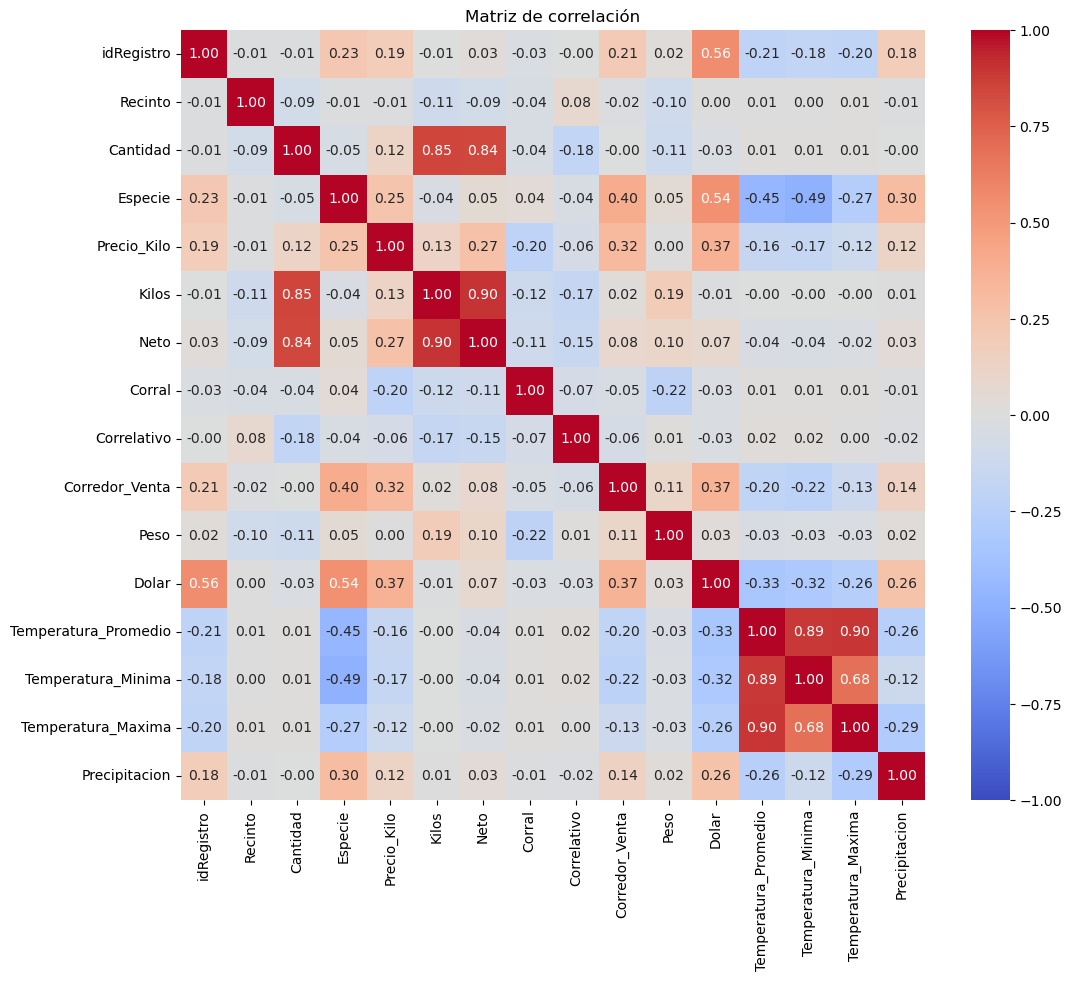


Correlaciones con 'Precio_Kilo':
Precio_Kilo             1.000000
Dolar                   0.368531
Corredor_Venta          0.317900
Neto                    0.269121
Especie                 0.254153
idRegistro              0.186846
Kilos                   0.130587
Cantidad                0.122044
Precipitacion           0.119178
Peso                    0.003304
Recinto                -0.011786
Correlativo            -0.063709
Temperatura_Maxima     -0.116497
Temperatura_Promedio   -0.161194
Temperatura_Minima     -0.168064
Corral                 -0.204792
Name: Precio_Kilo, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar únicamente columnas numéricas
numerical_columns = datasets["bd_transacciones"].select_dtypes(include=["number"])

# Confirmar columnas seleccionadas
print("Columnas numéricas para la matriz de correlación:")
print(numerical_columns.columns)

# Generar la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

# Opcional: Mostrar las correlaciones con 'Precio_Kilo'
print("\nCorrelaciones con 'Precio_Kilo':")
if "Precio_Kilo" in correlation_matrix.columns:
    print(correlation_matrix["Precio_Kilo"].sort_values(ascending=False))
else:
    print("La variable 'Precio_Kilo' no está en las columnas numéricas seleccionadas.")


In [ ]:
# Identificar las columnas a eliminar según la matriz de correlación y análisis
# Explicación:
# - "Peso": Correlación insignificante con Precio_Kilo.
# - "Recinto": Relación prácticamente inexistente (-0.011).
# - "Correlativo": Correlación débil y sin contexto lógico relevante.
columns_to_drop = ["Peso", "Recinto", "Correlativo"]

# Eliminar las columnas irrelevantes del dataset
df_final = datasets["bd_transacciones"].drop(columns=columns_to_drop)

# Confirmar el resultado
print("Columnas eliminadas:", columns_to_drop)
print("Resumen del dataset después de eliminar columnas irrelevantes:")
print(df_final.info())

# Verificar las primeras filas para asegurar que las transformaciones son correctas
print("\nPrimeras filas del dataset final:")
print(df_final.head())


Columnas eliminadas: ['Peso', 'Recinto', 'Correlativo']
Resumen del dataset después de eliminar columnas irrelevantes:
<class 'pandas.core.frame.DataFrame'>
Index: 966472 entries, 0 to 982025
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   idRegistro            966472 non-null  int64         
 1   Tipo_Remate           966472 non-null  object        
 2   Fecha                 966472 non-null  datetime64[ns]
 3   Cantidad              966472 non-null  int64         
 4   Especie               966472 non-null  int64         
 5   Raza                  966472 non-null  object        
 6   Marca                 966472 non-null  object        
 7   Precio_Kilo           966472 non-null  float64       
 8   Kilos                 966472 non-null  int64         
 9   Neto                  966472 non-null  int64         
 10  Corral                966472 non-null  int64         
 11  Cor

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleccionar las columnas de temperatura
temperature_columns = ["Temperatura_Promedio", "Temperatura_Minima", "Temperatura_Maxima"]

# Calcular el VIF para detectar multicolinealidad
vif_data = pd.DataFrame()
vif_data["Variable"] = temperature_columns
vif_data["VIF"] = [variance_inflation_factor(df_final[temperature_columns].values, i) for i in range(len(temperature_columns))]

print("Variance Inflation Factor (VIF) para las variables de temperatura:")
print(vif_data)


Variance Inflation Factor (VIF) para las variables de temperatura:
               Variable         VIF
0  Temperatura_Promedio  575.241236
1    Temperatura_Minima   82.782269
2    Temperatura_Maxima  291.388218


In [20]:
# Eliminar la columna Temperatura_Promedio
df_final = df_final.drop(columns=["Temperatura_Promedio"])

# Recalcular el VIF después de la eliminación
temperature_columns = ["Temperatura_Minima", "Temperatura_Maxima"]
vif_data = pd.DataFrame()
vif_data["Variable"] = temperature_columns
vif_data["VIF"] = [variance_inflation_factor(df_final[temperature_columns].values, i) for i in range(len(temperature_columns))]

print("VIF después de eliminar Temperatura_Promedio:")
print(vif_data)


VIF después de eliminar Temperatura_Promedio:
             Variable        VIF
0  Temperatura_Minima  23.395071
1  Temperatura_Maxima  23.395071


In [21]:
# Eliminar la columna Temperatura_Maxima
df_final = df_final.drop(columns=["Temperatura_Maxima"])

# Confirmar el cambio
print("Dataset después de eliminar Temperatura_Maxima y dejar solo Temperatura_Minima:")
print(df_final.info())

# Revisar las primeras filas para asegurar que la eliminación fue correcta
print("\nPrimeras filas del dataset final:")
print(df_final.head())


Dataset después de eliminar Temperatura_Maxima y dejar solo Temperatura_Minima:
<class 'pandas.core.frame.DataFrame'>
Index: 966472 entries, 0 to 982025
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   idRegistro          966472 non-null  int64         
 1   Tipo_Remate         966472 non-null  object        
 2   Fecha               966472 non-null  datetime64[ns]
 3   Cantidad            966472 non-null  int64         
 4   Especie             966472 non-null  int64         
 5   Raza                966472 non-null  object        
 6   Marca               966472 non-null  object        
 7   Precio_Kilo         966472 non-null  float64       
 8   Kilos               966472 non-null  int64         
 9   Neto                966472 non-null  int64         
 10  Corral              966472 non-null  int64         
 11  Corredor_Venta      966472 non-null  int64         
 12  Corredor_Co

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleccionar las columnas numéricas para el cálculo del VIF
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Eliminar la variable objetivo 'Precio_Kilo' de la lista
numerical_cols.remove('Precio_Kilo')

# Crear un DataFrame para almacenar los valores de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_cols

# Calcular el VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(df_final[numerical_cols].values, i)
                   for i in range(len(numerical_cols))]

print("VIF para las variables numéricas después de eliminar Temperatura_Maxima:")
print(vif_data)


VIF para las variables numéricas después de eliminar Temperatura_Maxima:
             Variable       VIF
0          idRegistro  1.213839
1            Cantidad  4.103761
2             Especie  1.840493
3               Kilos  6.375144
4                Neto  6.071838
5              Corral  1.035885
6      Corredor_Venta  1.232614
7               Dolar  0.156814
8  Temperatura_Minima  1.215850
9       Precipitacion  1.117894


In [23]:
# Eliminar la columna Neto
df_final = df_final.drop(columns=["Neto"])

# Recalcular el VIF después de eliminar Neto
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleccionar columnas numéricas restantes
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Precio_Kilo')  # Excluir la variable objetivo

# Crear un DataFrame para almacenar los valores de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(df_final[numerical_cols].values, i) 
                   for i in range(len(numerical_cols))]

print("VIF después de eliminar Neto:")
print(vif_data)


VIF después de eliminar Neto:
             Variable       VIF
0          idRegistro  1.211955
1            Cantidad  3.648877
2             Especie  1.814674
3               Kilos  3.697657
4              Corral  1.034492
5      Corredor_Venta  1.224614
6               Dolar  0.155938
7  Temperatura_Minima  1.214926
8       Precipitacion  1.117783


In [24]:
# Revisar las columnas categóricas
categorical_cols = df_final.select_dtypes(include=["object", "category"]).columns

# Mostrar las categorías únicas por columna
for col in categorical_cols:
    print(f"Columna: {col}")
    print(f"Categorías únicas: {df_final[col].nunique()}")
    print(df_final[col].value_counts().head(5))  # Mostrar las 5 categorías más frecuentes
    print("\n")


Columna: Tipo_Remate
Categorías únicas: 3
Tipo_Remate
F              946319
P               20152
Desconocido         1
Name: count, dtype: int64


Columna: Raza
Categorías únicas: 7239
Raza
CLAV           221442
CAB            204979
NEG             63333
Desconocido     63330
PAR             43044
Name: count, dtype: int64


Columna: Marca
Categorías únicas: 5671
Marca
/\ LOMO      38052
. LOMO       26671
+ LOMO       24888
.. LOMO      24061
Sin Marca    22815
Name: count, dtype: int64


Columna: Corredor_Compra
Categorías únicas: 70
Corredor_Compra
0.0     880709
9.0      12867
2.0       8241
41.0      7419
4.0       6262
Name: count, dtype: int64


Columna: Grupo
Categorías únicas: 8
Grupo
Bovinos     902403
Ovinos       24891
Porcinos     23652
Equinos      13356
Caprinos      1791
Name: count, dtype: int64


Columna: Categoria
Categorías únicas: 70
Categoria
TERNEROS            124423
VACA GORD.           76924
TERNEROS CARNE       61972
VAQ.ENGORDA          51156
VACA EXPORTAC

In [25]:
# Revisar la relación de cada variable categórica con Precio_Kilo
categorical_cols = ["Tipo_Remate", "Raza", "Marca", "Corredor_Compra", "Grupo", "Categoria"]

for col in categorical_cols:
    print(f"Análisis de {col}:")
    print(df_final.groupby(col)["Precio_Kilo"].mean().sort_values(ascending=False))
    print("\n")


Análisis de Tipo_Remate:
Tipo_Remate
P              1118.492801
F               999.468866
Desconocido       0.000000
Name: Precio_Kilo, dtype: float64


Análisis de Raza:
Raza
PAR NORM BAY           2170.0
NOR CLAV NEG           2170.0
LAGRT                  2165.0
29 KG                  2160.0
NAF CLAV NORM          2160.0
                        ...  
D.12507937                0.0
DECKER 15486390           0.0
DE TRABAJO                0.0
DE SERVICIO               0.0
HOLST.GC2112-FG0014       0.0
Name: Precio_Kilo, Length: 7239, dtype: float64


Análisis de Marca:
Marca
/\. NUCA      2170.00
SM MULATA     2160.00
R/LOMO        2150.54
HZ            2150.00
A30           2150.00
               ...   
OREJA VERD       0.00
OO ANCA.         0.00
/\/\ RABO        0.00
5 AZUL           0.00
/\ VERDED        0.00
Name: Precio_Kilo, Length: 5671, dtype: float64


Análisis de Corredor_Compra:
Corredor_Compra
58.0    2165.000000
76.0    2038.571429
71.0    1891.882456
24.0    1890.000000
5

/tmp/ipykernel_1318/3527056805.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_final.groupby(col)["Precio_Kilo"].mean().sort_values(ascending=False))


In [26]:
# Eliminar la categoría 'Desconocido'
df_final = df_final[df_final["Tipo_Remate"] != "Desconocido"]

# Aplicar One-Hot Encoding
df_final = pd.get_dummies(df_final, columns=["Tipo_Remate"], prefix="Tipo_Remate")

# Confirmar el resultado
print("Columnas después de procesar Tipo_Remate:")
print(df_final.info())


Columnas después de procesar Tipo_Remate:
<class 'pandas.core.frame.DataFrame'>
Index: 966471 entries, 0 to 982025
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   idRegistro          966471 non-null  int64         
 1   Fecha               966471 non-null  datetime64[ns]
 2   Cantidad            966471 non-null  int64         
 3   Especie             966471 non-null  int64         
 4   Raza                966471 non-null  object        
 5   Marca               966471 non-null  object        
 6   Precio_Kilo         966471 non-null  float64       
 7   Kilos               966471 non-null  int64         
 8   Corral              966471 non-null  int64         
 9   Corredor_Venta      966471 non-null  int64         
 10  Corredor_Compra     966471 non-null  category      
 11  Grupo               966471 non-null  object        
 12  Categoria           966471 non-null  object      

In [27]:
# Definir el umbral de frecuencia
threshold = 500

# Identificar las razas con pocas apariciones
rare_breeds = df_final["Raza"].value_counts()[df_final["Raza"].value_counts() < threshold].index

# Reemplazar razas poco frecuentes por 'Otras'
df_final["Raza"] = df_final["Raza"].apply(lambda x: "Otras" if x in rare_breeds else x)

# Eliminar razas con precios promedio de 0.0
mean_prices = df_final.groupby("Raza")["Precio_Kilo"].mean()
invalid_breeds = mean_prices[mean_prices == 0].index
df_final = df_final[~df_final["Raza"].isin(invalid_breeds)]

# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final["Raza"] = le.fit_transform(df_final["Raza"])

# Confirmar el resultado
print("Columnas después de procesar Raza:")
print(df_final.info())


Columnas después de procesar Raza:
<class 'pandas.core.frame.DataFrame'>
Index: 966471 entries, 0 to 982025
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   idRegistro          966471 non-null  int64         
 1   Fecha               966471 non-null  datetime64[ns]
 2   Cantidad            966471 non-null  int64         
 3   Especie             966471 non-null  int64         
 4   Raza                966471 non-null  int64         
 5   Marca               966471 non-null  object        
 6   Precio_Kilo         966471 non-null  float64       
 7   Kilos               966471 non-null  int64         
 8   Corral              966471 non-null  int64         
 9   Corredor_Venta      966471 non-null  int64         
 10  Corredor_Compra     966471 non-null  category      
 11  Grupo               966471 non-null  object        
 12  Categoria           966471 non-null  object        
 13 

In [28]:
# Agrupar marcas poco frecuentes
threshold = 500
rare_brands = df_final["Marca"].value_counts()[df_final["Marca"].value_counts() < threshold].index
df_final["Marca"] = df_final["Marca"].apply(lambda x: "Otras" if x in rare_brands else x)

# Eliminar marcas con precio promedio 0.0
mean_prices = df_final.groupby("Marca")["Precio_Kilo"].mean()
invalid_brands = mean_prices[mean_prices == 0].index
df_final = df_final[~df_final["Marca"].isin(invalid_brands)]

# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder
le_marca = LabelEncoder()
df_final["Marca"] = le_marca.fit_transform(df_final["Marca"])


In [29]:
# Asegurar que todos los valores en la columna sean cadenas
df_final["Corredor_Compra"] = df_final["Corredor_Compra"].astype(str)

# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder
le_corredor = LabelEncoder()
df_final["Corredor_Compra"] = le_corredor.fit_transform(df_final["Corredor_Compra"])

# Confirmar el resultado
print(df_final["Corredor_Compra"].head())


0    0
1    0
2    0
3    0
4    0
Name: Corredor_Compra, dtype: int64


In [30]:
# Eliminar categorías inválidas
mean_prices = df_final.groupby("Grupo")["Precio_Kilo"].mean()
invalid_grupos = mean_prices[mean_prices == 0].index
df_final = df_final[~df_final["Grupo"].isin(invalid_grupos)]

# Aplicar One-Hot Encoding
df_final = pd.get_dummies(df_final, columns=["Grupo"], prefix="Grupo")


In [31]:
# Agrupar categorías poco frecuentes
threshold = 100
rare_categorias = df_final["Categoria"].value_counts()[df_final["Categoria"].value_counts() < threshold].index
df_final["Categoria"] = df_final["Categoria"].apply(lambda x: "Otras" if x in rare_categorias else x)

# Eliminar categorías con precio promedio 0.0
mean_prices = df_final.groupby("Categoria")["Precio_Kilo"].mean()
invalid_categorias = mean_prices[mean_prices == 0].index
df_final = df_final[~df_final["Categoria"].isin(invalid_categorias)]

# Aplicar Label Encoding
le_categoria = LabelEncoder()
df_final["Categoria"] = le_categoria.fit_transform(df_final["Categoria"])


In [32]:
# Resumen general del dataset
print("Resumen general del dataset:")
print(df_final.info())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df_final.isnull().sum())

# Mostrar las primeras filas del dataset
print("\nPrimeras filas del dataset:")
print(df_final.head())

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df_final.describe())


Resumen general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 966454 entries, 0 to 982025
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   idRegistro          966454 non-null  int64         
 1   Fecha               966454 non-null  datetime64[ns]
 2   Cantidad            966454 non-null  int64         
 3   Especie             966454 non-null  int64         
 4   Raza                966454 non-null  int64         
 5   Marca               966454 non-null  int64         
 6   Precio_Kilo         966454 non-null  float64       
 7   Kilos               966454 non-null  int64         
 8   Corral              966454 non-null  int64         
 9   Corredor_Venta      966454 non-null  int64         
 10  Corredor_Compra     966454 non-null  int64         
 11  Categoria           966454 non-null  int64         
 12  Dolar               966454 non-null  float64       
 13  Tempe

In [33]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar valores fuera del rango
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Columna: {columna}")
    print(f"Limite inferior: {limite_inferior}, Limite superior: {limite_superior}")
    print(f"Outliers detectados: {len(outliers)}")
    return outliers

# Revisar las columnas relevantes
outliers_precio = detectar_outliers(df_final, "Precio_Kilo")
outliers_cantidad = detectar_outliers(df_final, "Cantidad")
outliers_kilos = detectar_outliers(df_final, "Kilos")


Columna: Precio_Kilo
Limite inferior: -162.5, Limite superior: 2177.5
Outliers detectados: 0
Columna: Cantidad
Limite inferior: -3.5, Limite superior: 8.5
Outliers detectados: 69568
Columna: Kilos
Limite inferior: -1093.0, Limite superior: 2915.0
Outliers detectados: 52539


In [34]:
def tratar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Ajustar valores fuera del rango
    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)
    return df

# Aplicar el tratamiento
df_final = tratar_outliers(df_final, "Precio_Kilo")
df_final = tratar_outliers(df_final, "Cantidad")
df_final = tratar_outliers(df_final, "Kilos")


In [35]:
# Confirmar los resultados después del tratamiento
print("Estadísticas descriptivas después del tratamiento:")
print(df_final[["Precio_Kilo", "Cantidad", "Kilos"]].describe())


Estadísticas descriptivas después del tratamiento:
         Precio_Kilo       Cantidad          Kilos
count  966454.000000  966454.000000  966454.000000
mean     1001.968272       3.090436     996.119068
std       462.201667       2.326790     796.497384
min         0.000000       0.000000       0.000000
25%       715.000000       1.000000     410.000000
50%      1000.000000       2.000000     733.000000
75%      1300.000000       4.000000    1412.000000
max      2170.000000       8.500000    2915.000000


In [36]:
# Filtrar registros donde Precio_Kilo es 0
precios_cero = df_final[df_final["Precio_Kilo"] == 0]

# Contar la cantidad total
print(f"Cantidad de registros con Precio_Kilo = 0: {len(precios_cero)}")

# Analizar la distribución por año
precios_cero_por_anio = precios_cero.groupby(precios_cero["Fecha"].dt.year).size()
print("\nDistribución de registros con Precio_Kilo = 0 por año:")
print(precios_cero_por_anio)

# Mostrar las primeras filas de estos registros para inspección
print("\nPrimeras filas de registros con Precio_Kilo = 0:")
print(precios_cero.head())


Cantidad de registros con Precio_Kilo = 0: 54745

Distribución de registros con Precio_Kilo = 0 por año:
Fecha
2012    2053
2013    5927
2014    6221
2015    4485
2016    3722
2017    3419
2018    4691
2019    5971
2020    4167
2021    3938
2022    4146
2023    5495
2024     510
dtype: int64

Primeras filas de registros con Precio_Kilo = 0:
     idRegistro      Fecha  Cantidad  Especie  Raza  Marca  Precio_Kilo  \
44       594119 2012-11-07       6.0       15    39    180          0.0   
145      594220 2012-11-07       4.0       25    39    180          0.0   
189      594264 2012-11-07       3.0        8    34    150          0.0   
223      594298 2012-11-07       1.0        6    27    167          0.0   
226      594301 2012-11-07       4.0        9    57    159          0.0   

     Kilos  Corral  Corredor_Venta  ...  Temperatura_Minima  Precipitacion  \
44       0     600               0  ...                10.5            0.0   
145      0     700               0  ...           

In [37]:
# Calcular la mediana del Precio_Kilo por año, excluyendo los valores de 0
mediana_por_anio = df_final[df_final["Precio_Kilo"] > 0].groupby(df_final["Fecha"].dt.year)["Precio_Kilo"].median()

# Reemplazar precios de 0 con la mediana correspondiente al año
df_final["Precio_Kilo"] = df_final.apply(
    lambda row: mediana_por_anio[row["Fecha"].year] if row["Precio_Kilo"] == 0 else row["Precio_Kilo"], axis=1
)

# Confirmar el resultado después de la imputación
print("Valores actualizados, precios de 0 imputados.")
print("\nEstadísticas descriptivas de Precio_Kilo:")
print(df_final["Precio_Kilo"].describe())

# Verificar si aún quedan valores de 0 en Precio_Kilo
precios_cero_restantes = df_final[df_final["Precio_Kilo"] == 0]
print(f"\nRegistros con Precio_Kilo = 0 después de la imputación: {len(precios_cero_restantes)}")


Valores actualizados, precios de 0 imputados.

Estadísticas descriptivas de Precio_Kilo:
count    966454.000000
mean       1060.603122
std         396.285166
min           0.030000
25%         775.000000
50%        1010.000000
75%        1310.000000
max        2170.000000
Name: Precio_Kilo, dtype: float64

Registros con Precio_Kilo = 0 después de la imputación: 0


In [38]:
# Filtrar registros con Precio_Kilo por debajo de $1
registros_bajo_dolar = df_final[df_final["Precio_Kilo"] < 1]

# Contar los registros
cantidad_registros_bajo_dolar = len(registros_bajo_dolar)
print(f"Cantidad de registros con Precio_Kilo por debajo de $1: {cantidad_registros_bajo_dolar}")

# Mostrar los primeros 20 registros para inspección
print("\nTop 20 registros con Precio_Kilo por debajo de $1:")
print(registros_bajo_dolar.head(20))


Cantidad de registros con Precio_Kilo por debajo de $1: 10

Top 20 registros con Precio_Kilo por debajo de $1:
        idRegistro      Fecha  Cantidad  Especie  Raza  Marca  Precio_Kilo  \
151933       97049 2014-06-03       2.0       27    48      6         0.32   
591372      380613 2019-11-28       2.0       46     8    174         0.09   
591399      380640 2019-11-28       2.0       58     8     57         0.05   
617416      397292 2020-03-23       5.0       69     8     24         0.12   
643086      411717 2020-08-13       5.0       69     5     30         0.29   
814067      515910 2022-08-25       3.0       69     8    167         0.03   
819988      519647 2022-09-29       2.0       69     8    167         0.15   
819989      519648 2022-09-29       2.0       69     8    156         0.32   
894486      566342 2023-09-14       8.5       69    44     23         0.03   
894487      566343 2023-09-14       8.5       69    44     30         0.03   

        Kilos  Corral  Corredo

In [39]:
# Eliminar registros con Precio_Kilo por debajo de $1
df_final = df_final[df_final["Precio_Kilo"] >= 1]
print(f"Registros después de eliminar precios sospechosos: {len(df_final)}")


Registros después de eliminar precios sospechosos: 966444


# 🚀 Preparación de Datos y Modelado con XGBoost

Este script en **Python** realiza la preparación de datos y el ajuste de un modelo **XGBoost Regressor** para predecir el **Precio por Kilo** en transacciones ganaderas. Se incluyen técnicas de preprocesamiento, análisis de colinealidad y optimización de hiperparámetros.

---

## 📌 Etapas del Proceso

### 1️⃣ **División en Conjuntos de Entrenamiento y Validación**
   - Se separan las variables predictoras (**X**) y la variable objetivo (**y**).
   - Se realiza una **división 80/20** usando `train_test_split`.

### 2️⃣ **Escalado de Variables Numéricas**
   - Se utiliza **StandardScaler** para normalizar las columnas numéricas y mejorar el rendimiento del modelo.

### 3️⃣ **Transformación de Variables Temporales**
   - Se extraen **Año, Mes y Día** a partir de la fecha.
   - Se crea una nueva variable **Fecha_num**, que representa la cantidad de días desde una fecha base.

### 4️⃣ **Análisis de Colinealidad con VIF**
   - Se calcula el **Factor de Inflación de Varianza (VIF)** para detectar posibles problemas de multicolinealidad entre variables.

### 5️⃣ **Preparación del Dataset para XGBoost**
   - Se convierte el dataset a formato `DMatrix` para mejorar la eficiencia en el entrenamiento.

### 6️⃣ **Optimización de Hiperparámetros**
   - Se realiza una **búsqueda manual de hiperparámetros**, evaluando combinaciones de:
     - Profundidad del árbol (`max_depth`)
     - Tasa de aprendizaje (`learning_rate`)
     - Peso mínimo de los nodos (`min_child_weight`)
     - Proporción de datos usada en cada árbol (`subsample`)
     - Fracción de características utilizada (`colsample_bytree`)
   - Se selecciona el modelo con **menor RMSE**.

### 7️⃣ **Entrenamiento y Evaluación del Mejor Modelo**
   - Se entrena el modelo óptimo en el conjunto de entrenamiento.
   - Se calculan métricas de rendimiento:
     - **RMSE (Error Cuadrático Medio Raíz)**
     - **R² (Coeficiente de Determinación)**



In [40]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_final.drop(columns=["Precio_Kilo"])  # Eliminar la variable objetivo
y = df_final["Precio_Kilo"]  # Variable objetivo

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmar los tamaños de los conjuntos
print(f"Registros en el conjunto de entrenamiento: {len(X_train)}")
print(f"Registros en el conjunto de validación: {len(X_val)}")


Registros en el conjunto de entrenamiento: 773155
Registros en el conjunto de validación: 193289


In [41]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas
columnas_numericas = X.select_dtypes(include=["int64", "float64"]).columns

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento y validación
X_train[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_val[columnas_numericas] = scaler.transform(X_val[columnas_numericas])

# Confirmar el escalado
print("\nPrimeras filas de X_train escalado:")
print(X_train.head())



Primeras filas de X_train escalado:
        idRegistro      Fecha  Cantidad   Especie      Raza     Marca  \
960288    4.548073 2024-05-10 -0.898471  1.529176 -1.411924  1.029391   
153933   -0.223813 2014-06-16  1.250588 -0.919748 -1.060527 -1.089740   
344163   -0.223813 2016-09-27 -0.468659 -1.046417  0.796852  0.253371   
865318   -0.223812 2023-04-27  1.250588  1.275839 -0.909929 -1.089740   
182235   -0.223812 2014-10-24 -0.898471 -0.708634  1.298846  0.507070   

           Kilos    Corral  Corredor_Venta  Corredor_Compra  ...  \
960288 -0.308854 -0.016028       -0.385634        -0.259217  ...   
153933  2.408792 -0.386153       -0.385634        -0.259217  ...   
344163 -0.725602 -0.429191       -0.385634        -0.259217  ...   
865318  0.615020 -0.420583       -0.385634        -0.259217  ...   
182235 -0.509697 -0.033243       -0.385634        -0.259217  ...   

        Temperatura_Minima  Precipitacion  Tipo_Remate_F  Tipo_Remate_P  \
960288           -2.221514      -0.29329

In [42]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas
columnas_numericas = X.select_dtypes(include=["int64", "float64"]).columns

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento y validación
X_train[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_val[columnas_numericas] = scaler.transform(X_val[columnas_numericas])

# Confirmar el escalado
print("\nPrimeras filas de X_train escalado:")
print(X_train.head())



Primeras filas de X_train escalado:
        idRegistro      Fecha  Cantidad   Especie      Raza     Marca  \
960288    4.548073 2024-05-10 -0.898471  1.529176 -1.411924  1.029391   
153933   -0.223813 2014-06-16  1.250588 -0.919748 -1.060527 -1.089740   
344163   -0.223813 2016-09-27 -0.468659 -1.046417  0.796852  0.253371   
865318   -0.223812 2023-04-27  1.250588  1.275839 -0.909929 -1.089740   
182235   -0.223812 2014-10-24 -0.898471 -0.708634  1.298846  0.507070   

           Kilos    Corral  Corredor_Venta  Corredor_Compra  ...  \
960288 -0.308854 -0.016028       -0.385634        -0.259217  ...   
153933  2.408792 -0.386153       -0.385634        -0.259217  ...   
344163 -0.725602 -0.429191       -0.385634        -0.259217  ...   
865318  0.615020 -0.420583       -0.385634        -0.259217  ...   
182235 -0.509697 -0.033243       -0.385634        -0.259217  ...   

        Temperatura_Minima  Precipitacion  Tipo_Remate_F  Tipo_Remate_P  \
960288           -2.221514      -0.29329

In [43]:
# Crear columnas de Año, Mes y Día a partir de Fecha
X_train["Mes"] = X_train["Fecha"].dt.month
X_train["Día"] = X_train["Fecha"].dt.day

X_val["Mes"] = X_val["Fecha"].dt.month
X_val["Día"] = X_val["Fecha"].dt.day


In [44]:
# Transformar 'Fecha' en días desde una fecha base (e.g., el primer día de los datos)
fecha_base = pd.to_datetime("2012-01-01")  # Fecha base de referencia
X_train["Fecha_num"] = (X_train["Fecha"] - fecha_base).dt.days
X_val["Fecha_num"] = (X_val["Fecha"] - fecha_base).dt.days



In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluar VIF incluyendo 'Fecha_num'
variables_vif = X_train[["Fecha_num", "Dolar", "Temperatura_Minima", "Precipitacion"]]
vif_data = pd.DataFrame()
vif_data["Variable"] = variables_vif.columns
vif_data["VIF"] = [variance_inflation_factor(variables_vif.values, i) for i in range(variables_vif.shape[1])]

print("Variance Inflation Factor (VIF) con 'Fecha_num':")
print(vif_data)


Variance Inflation Factor (VIF) con 'Fecha_num':
             Variable       VIF
0           Fecha_num  1.139688
1               Dolar  1.267220
2  Temperatura_Minima  1.131354
3       Precipitacion  1.077491


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Incluir 'Mes' y 'Día' en el análisis de VIF
variables_vif = X_train[["Mes", "Día", "Dolar", "Temperatura_Minima", "Precipitacion"]]
vif_data = pd.DataFrame()
vif_data["Variable"] = variables_vif.columns
vif_data["VIF"] = [variance_inflation_factor(variables_vif.values, i) for i in range(variables_vif.shape[1])]

print("Variance Inflation Factor (VIF) con 'Mes' y 'Día':")
print(vif_data)


Variance Inflation Factor (VIF) con 'Mes' y 'Día':
             Variable       VIF
0                 Mes  2.513849
1                 Día  2.535469
2               Dolar  1.182060
3  Temperatura_Minima  1.129407
4       Precipitacion  1.078758


In [47]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas y categóricas
numerical_cols = ["Dolar", "Temperatura_Minima", "Precipitacion", "Mes", "Día"]
categorical_cols = [
    "Tipo_Remate_F", "Tipo_Remate_P", "Grupo_Bovinos", "Grupo_Caprinos",
    "Grupo_Equinos", "Grupo_Maquinarias", "Grupo_Ovinos", "Grupo_Porcinos"
]

# Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_val_scaled = X_val.copy()
X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])

# Confirmar la preparación del dataset
print("Primeras filas del dataset escalado (X_train):")
print(X_train_scaled.head())

print("\nVariables categóricas:")
for col in categorical_cols:
    print(f"{col}: Únicas -> {X_train_scaled[col].nunique()}")

print("\nVerificando dimensiones:")
print(f"X_train: {X_train_scaled.shape}, X_val: {X_val_scaled.shape}")


Primeras filas del dataset escalado (X_train):
        idRegistro      Fecha  Cantidad   Especie      Raza     Marca  \
960288    4.548073 2024-05-10 -0.898471  1.529176 -1.411924  1.029391   
153933   -0.223813 2014-06-16  1.250588 -0.919748 -1.060527 -1.089740   
344163   -0.223813 2016-09-27 -0.468659 -1.046417  0.796852  0.253371   
865318   -0.223812 2023-04-27  1.250588  1.275839 -0.909929 -1.089740   
182235   -0.223812 2014-10-24 -0.898471 -0.708634  1.298846  0.507070   

           Kilos    Corral  Corredor_Venta  Corredor_Compra  ...  \
960288 -0.308854 -0.016028       -0.385634        -0.259217  ...   
153933  2.408792 -0.386153       -0.385634        -0.259217  ...   
344163 -0.725602 -0.429191       -0.385634        -0.259217  ...   
865318  0.615020 -0.420583       -0.385634        -0.259217  ...   
182235 -0.509697 -0.033243       -0.385634        -0.259217  ...   

        Tipo_Remate_P  Grupo_Bovinos  Grupo_Caprinos  Grupo_Equinos  \
960288          False          Fal

PARAR AQUI

In [48]:
final_columns = X_train_scaled.columns
print(final_columns)

Index(['idRegistro', 'Fecha', 'Cantidad', 'Especie', 'Raza', 'Marca', 'Kilos',
       'Corral', 'Corredor_Venta', 'Corredor_Compra', 'Categoria', 'Dolar',
       'Temperatura_Minima', 'Precipitacion', 'Tipo_Remate_F', 'Tipo_Remate_P',
       'Grupo_Bovinos', 'Grupo_Caprinos', 'Grupo_Equinos', 'Grupo_Maquinarias',
       'Grupo_Ovinos', 'Grupo_Porcinos', 'Mes', 'Día', 'Fecha_num'],
      dtype='object')


In [49]:
!pip install --upgrade xgboost scikit-learn


In [50]:
!pip install xgboost



In [51]:
import xgboost
import sklearn
print(f"XGBoost version: {xgboost.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")


XGBoost version: 2.1.4
Scikit-learn version: 1.6.1


In [52]:
X_train_scaled["Año"] = X_train_scaled["Fecha"].dt.year
X_train_scaled["Mes"] = X_train_scaled["Fecha"].dt.month
X_train_scaled["Día"] = X_train_scaled["Fecha"].dt.day

X_val_scaled["Año"] = X_val_scaled["Fecha"].dt.year
X_val_scaled["Mes"] = X_val_scaled["Fecha"].dt.month
X_val_scaled["Día"] = X_val_scaled["Fecha"].dt.day


In [53]:
X_train_scaled = X_train_scaled.drop(columns=["Fecha"])
X_val_scaled = X_val_scaled.drop(columns=["Fecha"])


In [54]:
# Convertir 'Fecha_num' a un tipo numérico adecuado
X_train_scaled["Fecha_num"] = pd.to_numeric(X_train_scaled["Fecha_num"], errors='coerce')
X_val_scaled["Fecha_num"] = pd.to_numeric(X_val_scaled["Fecha_num"], errors='coerce')

X_train_scaled = X_train_scaled.drop(columns=["Fecha_num"])
X_val_scaled = X_val_scaled.drop(columns=["Fecha_num"])


In [55]:
!pip install --upgrade pandas


  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
amazon-sagemaker-sql-magic 0.1.3 requires sqlparse==0.5.0, but you have sqlparse 0.5.1 which is incompatible.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.6.1 which is incompatible.
autogluon-multimodal 1.1.1 requires jsonschema<4.2

In [56]:
print(X_train_scaled.dtypes)


idRegistro            float64
Cantidad              float64
Especie               float64
Raza                  float64
Marca                 float64
Kilos                 float64
Corral                float64
Corredor_Venta        float64
Corredor_Compra       float64
Categoria             float64
Dolar                 float64
Temperatura_Minima    float64
Precipitacion         float64
Tipo_Remate_F            bool
Tipo_Remate_P            bool
Grupo_Bovinos            bool
Grupo_Caprinos           bool
Grupo_Equinos            bool
Grupo_Maquinarias        bool
Grupo_Ovinos             bool
Grupo_Porcinos           bool
Mes                     int32
Día                     int32
Año                     int32
dtype: object


In [57]:
!pip install --upgrade xgboost scikit-learn
!pip install --upgrade pandas xgboost
!pip show xgboost
!pip show scikit-learn


Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /opt/conda/lib/python3.11/site-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation

In [58]:
X_train_scaled = X_train_scaled.astype('float64')
X_val_scaled = X_val_scaled.astype('float64')


In [59]:
for col in X_train_scaled.select_dtypes(include=['object', 'category']).columns:
    X_train_scaled[col] = X_train_scaled[col].astype('category').cat.codes
    X_val_scaled[col] = X_val_scaled[col].astype('category').cat.codes


In [61]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_val_scaled = X_val_scaled.reset_index(drop=True)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convertir los datos a DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dval = xgb.DMatrix(X_val_scaled, label=y_val)

# Parámetros a probar
param_grid = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse']
}

# Variables para guardar el mejor modelo y resultados
best_rmse = float('inf')
best_params = None
best_model = None

# Búsqueda manual de hiperparámetros
print("Iniciando búsqueda de hiperparámetros...")
for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for min_child_weight in param_grid['min_child_weight']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    # Definir parámetros actuales
                    params = {
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'min_child_weight': min_child_weight,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'objective': 'reg:squarederror',
                        'eval_metric': 'rmse',
                    }

                    # Entrenamiento con los parámetros actuales
                    evals = [(dtrain, 'train'), (dval, 'eval')]
                    model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=False)

                    # Evaluar el modelo
                    y_pred = model.predict(dval)
                    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

                    # Imprimir resultados intermedios
                    print(f"Probando con parámetros: {params}")
                    print(f"RMSE: {rmse:.2f}")

                    # Guardar el mejor modelo
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = params
                        best_model = model

# Resultados finales
print("\nMejor RMSE: {:.2f}".format(best_rmse))
print("Mejores parámetros:", best_params)

# Predicción final con el mejor modelo
y_pred = best_model.predict(dval)
r2 = r2_score(y_val, y_pred)
print(f"\nEvaluación del mejor modelo:\nRMSE: {best_rmse:.2f}\nR²: {r2:.2f}")




Iniciando búsqueda de hiperparámetros...
Probando con parámetros: {'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
RMSE: 262.97
Probando con parámetros: {'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 1.0, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
RMSE: 261.94
Probando con parámetros: {'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 0.8, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
RMSE: 262.86
Probando con parámetros: {'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
RMSE: 261.96
Probando con parámetros: {'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'reg:squarederr